<a href="https://colab.research.google.com/github/yulin09/KPI_ProcurementAnalysis/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
url = 'https://raw.githubusercontent.com/yulin09/KPI_ProcurementAnalysis/refs/heads/main/Procurement%20KPI%20Analysis%20Dataset.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(url)
print(df.head())

      PO_ID         Supplier  Order_Date Delivery_Date    Item_Category  \
0  PO-00001        Alpha_Inc  2023-10-17    2023-10-25  Office Supplies   
1  PO-00002  Delta_Logistics  2022-04-25    2022-05-05  Office Supplies   
2  PO-00003         Gamma_Co  2022-01-26    2022-02-15              MRO   
3  PO-00004    Beta_Supplies  2022-10-09    2022-10-28        Packaging   
4  PO-00005  Delta_Logistics  2022-09-08    2022-09-20    Raw Materials   

  Order_Status  Quantity  Unit_Price  Negotiated_Price  Defective_Units  \
0    Cancelled      1176       20.13             17.81              NaN   
1    Delivered      1509       39.32             37.34            235.0   
2    Delivered       910       95.51             92.26             41.0   
3    Delivered      1344       99.85             95.52            112.0   
4    Delivered      1180       64.07             60.53            171.0   

  Compliance  
0        Yes  
1        Yes  
2        Yes  
3        Yes  
4         No  


In [11]:
print(df)

        PO_ID         Supplier  Order_Date Delivery_Date    Item_Category  \
0    PO-00001        Alpha_Inc  2023-10-17    2023-10-25  Office Supplies   
1    PO-00002  Delta_Logistics  2022-04-25    2022-05-05  Office Supplies   
2    PO-00003         Gamma_Co  2022-01-26    2022-02-15              MRO   
3    PO-00004    Beta_Supplies  2022-10-09    2022-10-28        Packaging   
4    PO-00005  Delta_Logistics  2022-09-08    2022-09-20    Raw Materials   
..        ...              ...         ...           ...              ...   
772  PO-00773  Delta_Logistics  2023-02-11    2023-02-20      Electronics   
773  PO-00774        Alpha_Inc  2022-07-23           NaN  Office Supplies   
774  PO-00775         Gamma_Co  2022-03-19    2022-04-07    Raw Materials   
775  PO-00776    Beta_Supplies  2023-08-30    2023-09-11              MRO   
776  PO-00777    Beta_Supplies  2023-12-09    2023-12-11  Office Supplies   

    Order_Status  Quantity  Unit_Price  Negotiated_Price  Defective_Units  

In [12]:
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [14]:
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

##Data Cleaning

duplicate

In [25]:
duplicate_rows = df[df.duplicated]

Null

In [42]:
df.isnull().any()


,0
Po_Id,False
Supplier,False
Order_Date,False
Delivery_Date,True
Item_Category,False
Order_Status,False
Quantity,False
Unit_Price,False
Negotiated_Price,False
Defective_Units,True


In [44]:
df[df.isnull().any(axis=1)]


,Po_Id,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
13,PO-00014,Beta_Supplies,2022-02-02,NaT,MRO,Delivered,5000,18.30,16.88,NaN,Yes
15,PO-00016,Beta_Supplies,2022-04-06,2022-04-21,Packaging,Delivered,5000,15.41,15.12,NaN,Yes
17,PO-00018,Epsilon_Group,2022-08-27,2022-09-04,Raw Materials,Delivered,921,51.48,50.61,NaN,Yes
19,PO-00020,Delta_Logistics,2023-09-09,2023-09-24,Raw Materials,Delivered,180,45.74,38.89,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
751,PO-00752,Beta_Supplies,2023-11-17,NaT,Electronics,Cancelled,86,93.60,88.22,5.0,Yes
752,PO-00753,Epsilon_Group,2022-04-28,NaT,MRO,Delivered,1853,21.92,20.72,NaN,Yes
767,PO-00768,Epsilon_Group,2022-01-27,2022-02-09,Office Supplies,Delivered,1415,80.19,78.34,NaN,Yes
769,PO-00770,Epsilon_Group,2023-08-13,NaT,Office Supplies,Delivered,748,85.95,79.16,32.0,Yes


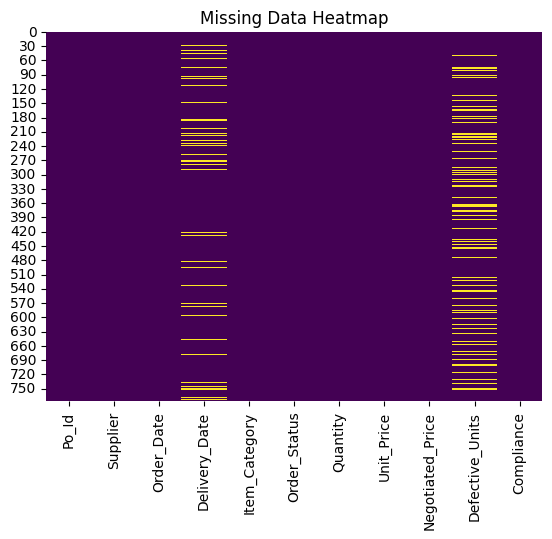

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [47]:
df['Defective_Units'] = df['Defective_Units'].fillna(0)
df.head()

,Po_Id,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,0.0,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


format

In [32]:
df.dtypes

,0
Po Id,object
Supplier,object
Order Date,object
Delivery Date,object
Item Category,object
Order Status,object
Quantity,int64
Unit Price,float64
Negotiated Price,float64
Defective Units,float64


In [48]:
df.Order_Date = df.Order_Date.astype('datetime64[ns]')
df.Delivery_Date = df.Delivery_Date.astype('datetime64[ns]')
df.Defective_Units = df.Defective_Units.astype('int64')

df.dtypes

,0
Po_Id,object
Supplier,object
Order_Date,datetime64[ns]
Delivery_Date,datetime64[ns]
Item_Category,object
Order_Status,object
Quantity,int64
Unit_Price,float64
Negotiated_Price,float64
Defective_Units,int64


change hypens to string

In [50]:
df['Supplier'] = df['Supplier'].str.replace("_", " ")
df.head()

,Po_Id,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,0,Yes
1,PO-00002,Delta Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235,Yes
2,PO-00003,Gamma Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41,Yes
3,PO-00004,Beta Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112,Yes
4,PO-00005,Delta Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171,No


In [51]:
df.columns = [col.replace("_"," ") for col in df.columns]
df.head()

,Po Id,Supplier,Order Date,Delivery Date,Item Category,Order Status,Quantity,Unit Price,Negotiated Price,Defective Units,Compliance
0,PO-00001,Alpha Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,0,Yes
1,PO-00002,Delta Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235,Yes
2,PO-00003,Gamma Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41,Yes
3,PO-00004,Beta Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112,Yes
4,PO-00005,Delta Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171,No
